Cluster 1: ['A1', 'B1', 'C2']
Centroid 1: [3.66666667 9.        ]
Cluster 2: ['A2', 'C1']
Centroid 2: [1.5 3.5]
Cluster 3: ['A3', 'B2', 'B3']
Centroid 3: [7.         4.33333333]


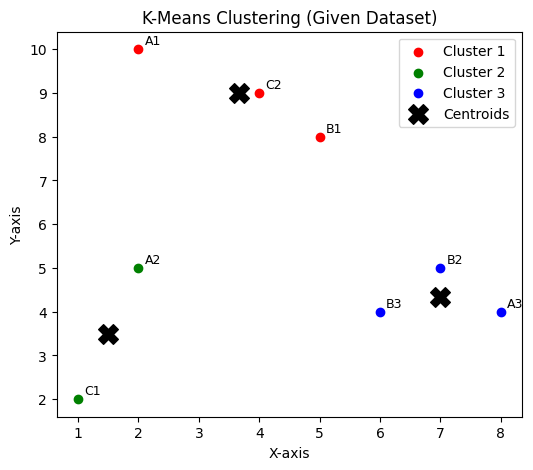

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Given points
points = {
    'A1': (2,10),
    'A2': (2,5),
    'A3': (8,4),
    'B1': (5,8),
    'B2': (7,5),
    'B3': (6,4),
    'C1': (1,2),
    'C2': (4,9)
}

# Convert to NumPy array
X = np.array(list(points.values()))
labels = list(points.keys())
k = 3               # number of clusters
max_iters = 100     # maximum iterations
centroids = np.array([X[0], X[1], X[2]])  # A1, A2, A3
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2, axis=1))

def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = euclidean_distance(point, centroids)
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroid = cluster_points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)
for iteration in range(max_iters):
    clusters = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, clusters, k)

    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids
for i in range(k):
    cluster_points = [labels[j] for j in range(len(X)) if clusters[j] == i]
    print(f"Cluster {i+1}: {cluster_points}")
    print(f"Centroid {i+1}: {centroids[i]}")
colors = ['red', 'green', 'blue']

plt.figure(figsize=(6,5))
for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
for label, (x, y) in points.items():
    plt.text(x+0.1, y+0.1, label, fontsize=9)

plt.title('K-Means Clustering (Given Dataset)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

